<a href="https://colab.research.google.com/github/iamharkirat/STP-540-Computational-Statistics/blob/main/STP540_Single_Layer_Neural_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Simulated Data

In [2]:
np.random.seed(42)
X = np.random.rand(100, 10) * 10
y = np.where(X[:, 0] > 5, 1, 0)  # use the first column of X as the label

In [3]:
X.shape

(100, 10)

## Run the Model

In [33]:
# Generate simulated data
np.random.seed(42)
X = np.random.rand(100, 10) * 10
y = np.where(X[:, 0] > 5, 1, 0) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'epochs': [50, 100, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'hidden_units': [2, 4 , 10]
}

# Create a function that builds the model
def build_model(hidden_units=8, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=hidden_units, input_shape=[X_train_scaled.shape[1]], activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the model using KerasRegressor
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit GridSearchCV object to data
grid_search.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Save hyperparameters and corresponding accuracy in a pandas dataframe
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_epochs', 'param_learning_rate', 'param_hidden_units', 'mean_test_score']]
results = results.rename(columns={
    'param_epochs': 'Epochs', 
    'param_learning_rate': 'Learning Rate', 
    'param_hidden_units': 'Hidden Units', 
    'mean_test_score': 'Accuracy'
})

# Sort results by accuracy and reset index
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results)

Epoch 1/100


<ipython-input-33-7d9c8de7cb5e>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)


Streaming output truncated to the last 5000 lines.
Epoch 28/100
2/2 [==============================] - 0s 67ms/step - loss: 0.4186 - accuracy: 0.8810 - val_loss: 0.5480 - val_accuracy: 0.9091
Epoch 29/100
2/2 [==============================] - 0s 68ms/step - loss: 0.4105 - accuracy: 0.8810 - val_loss: 0.5423 - val_accuracy: 0.9091
Epoch 30/100
2/2 [==============================] - 0s 61ms/step - loss: 0.4022 - accuracy: 0.9048 - val_loss: 0.5370 - val_accuracy: 0.9091
Epoch 31/100
2/2 [==============================] - 0s 62ms/step - loss: 0.3936 - accuracy: 0.9048 - val_loss: 0.5311 - val_accuracy: 0.9091
Epoch 32/100
2/2 [==============================] - 0s 75ms/step - loss: 0.3850 - accuracy: 0.9048 - val_loss: 0.5244 - val_accuracy: 0.9091
Epoch 33/100
2/2 [==============================] - 0s 67ms/step - loss: 0.3760 - accuracy: 0.9286 - val_loss: 0.5171 - val_accuracy: 0.9091
Epoch 34/100
2/2 [==============================] - 0s 73ms/step - loss: 0.3674 - accuracy: 0.9286 - va

In [34]:
results.to_csv('results_sim.csv', index=False)

# Apply the Model to Real Data

In [20]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [22]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

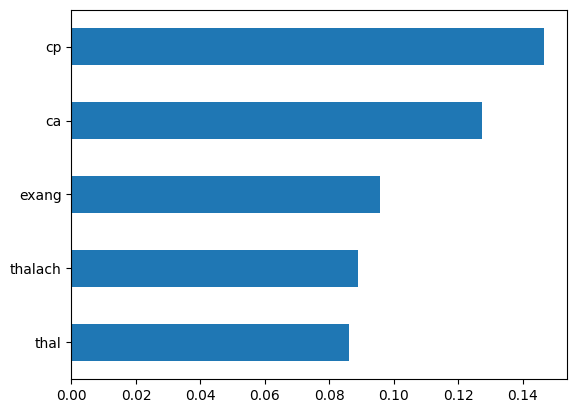

In [23]:
# fetaure importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

feature_importance=pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh').invert_yaxis();

In [24]:
# data processing

categorical_val.remove('target')
dataset=pd.get_dummies(df, columns=categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc=StandardScaler()
col_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale]=s_sc.fit_transform(dataset[col_to_scale])

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   float64
 1   trestbps   1025 non-null   float64
 2   chol       1025 non-null   float64
 3   thalach    1025 non-null   float64
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_0      1025 non-null   uint8  
 7   sex_1      1025 non-null   uint8  
 8   cp_0       1025 non-null   uint8  
 9   cp_1       1025 non-null   uint8  
 10  cp_2       1025 non-null   uint8  
 11  cp_3       1025 non-null   uint8  
 12  fbs_0      1025 non-null   uint8  
 13  fbs_1      1025 non-null   uint8  
 14  restecg_0  1025 non-null   uint8  
 15  restecg_1  1025 non-null   uint8  
 16  restecg_2  1025 non-null   uint8  
 17  exang_0    1025 non-null   uint8  
 18  exang_1    1025 non-null   uint8  
 19  slope_0    1025 non-null   uint8  
 20  slope_1 

In [30]:
dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

## Run the model on Real Data

In [31]:
# Define input and output variables
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'epochs': [50, 100, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'hidden_units': [2, 4 , 10]
}

# Create a function that builds the model
def build_model(hidden_units=8, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=hidden_units, input_shape=[X_train_scaled.shape[1]], activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the model using KerasRegressor
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit GridSearchCV object to data
grid_search.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Save hyperparameters and corresponding accuracy in a pandas dataframe
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_epochs', 'param_learning_rate', 'param_hidden_units', 'mean_test_score']]
results = results.rename(columns={
    'param_epochs': 'Epochs', 
    'param_learning_rate': 'Learning Rate', 
    'param_hidden_units': 'Hidden Units', 
    'mean_test_score': 'Accuracy'
})

# Sort results by accuracy and reset index
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results)


Epoch 1/100


<ipython-input-31-b59026a29ef8>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)


Streaming output truncated to the last 5000 lines.
Epoch 28/100
14/14 [==============================] - 0s 12ms/step - loss: 0.2355 - accuracy: 0.9037 - val_loss: 0.4504 - val_accuracy: 0.7818
Epoch 29/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2344 - accuracy: 0.9037 - val_loss: 0.4547 - val_accuracy: 0.7818
Epoch 30/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2339 - accuracy: 0.9014 - val_loss: 0.4511 - val_accuracy: 0.7818
Epoch 31/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2347 - accuracy: 0.8991 - val_loss: 0.4455 - val_accuracy: 0.7818
Epoch 32/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2338 - accuracy: 0.9037 - val_loss: 0.4518 - val_accuracy: 0.7818
Epoch 33/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2329 - accuracy: 0.9037 - val_loss: 0.4543 - val_accuracy: 0.7818
Epoch 34/100
14/14 [==============================] - 0s 11ms/step - loss: 0.2323 - accuracy: 

In [32]:
results.to_csv('results_real.csv', index=False)